<a href="https://colab.research.google.com/github/evafiorina/evafiorina/blob/main/Tugas%2011/Tugas11_LeNet_Eva_Fiorina_Siahaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Eva Fiorina Siahaan

NIM : 1103210101

Tugas 11

Model : LeNet

ChatgptPrompt : https://chatgpt.com/share/a696a888-b09d-4f70-9e6a-f79fb47e4d9a

# **Penjelasan LeNet**

**Model LeNet** adalah salah satu arsitektur jaringan saraf konvolusional (Convolutional Neural Network atau CNN) yang diperkenalkan oleh Yann LeCun dan rekan-rekannya pada tahun 1998. LeNet dirancang untuk pengenalan tulisan tangan, khususnya pada dataset MNIST. Model ini menjadi dasar bagi banyak perkembangan dalam bidang deep learning dan computer vision.

Arsitektur LeNet

**LeNet** terdiri dari tujuh lapisan (termasuk lapisan input, tetapi tidak termasuk lapisan output). Berikut adalah deskripsi singkat dari setiap lapisan:

Lapisan Input: Gambar grayscale berukuran 32x32 piksel.
C1 - Lapisan Konvolusi: Lapisan konvolusi dengan 6 filter (kernel) berukuran 5x5, menghasilkan fitur berukuran 28x28.
S2 - Lapisan Pooling/Subsampling: Lapisan pooling dengan ukuran 2x2 dan stride 2, menghasilkan fitur berukuran 14x14.
C3 - Lapisan Konvolusi: Lapisan konvolusi dengan 16 filter berukuran 5x5, menghasilkan fitur berukuran 10x10.
S4 - Lapisan Pooling/Subsampling: Lapisan pooling dengan ukuran 2x2 dan stride 2, menghasilkan fitur berukuran 5x5.
C5 - Lapisan Konvolusi: Lapisan konvolusi dengan 120 filter berukuran 5x5, menghasilkan fitur berukuran 1x1.
F6 - Lapisan Fully Connected: Lapisan fully connected dengan 84 neuron.
Output Layer: Lapisan output dengan 10 neuron (untuk klasifikasi 10 digit pada dataset MNIST).

**Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

Memuat Data dan Normalisasi

In [2]:
# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalisasi gambar ke nilai [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


LeNet Model

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

Latih dan Kompilasi Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 35s 17ms/step - loss: 0.2307 - accuracy: 0.9281 - val_loss: 0.0762 - val_accuracy: 0.9755
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0753 - accuracy: 0.9766 - val_loss: 0.0549 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0546 - accuracy: 0.9833 - val_loss: 0.0449 - val_accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0389 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0464 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0327 - val_accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0314 -

Evaluasi Model

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - loss: 0.0444 - accuracy: 0.9874 - 2s/epoch - 8ms/step

Test accuracy: 0.9873999953269958


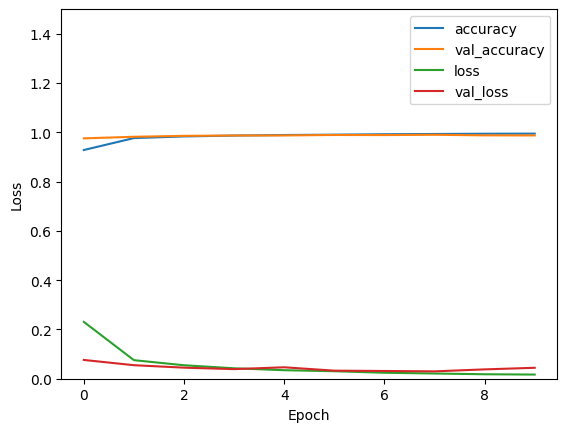

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.5])
plt.legend(loc='upper right')
plt.show()

Confusion Matriks

313/313 [==============================] - 3s 9ms/step


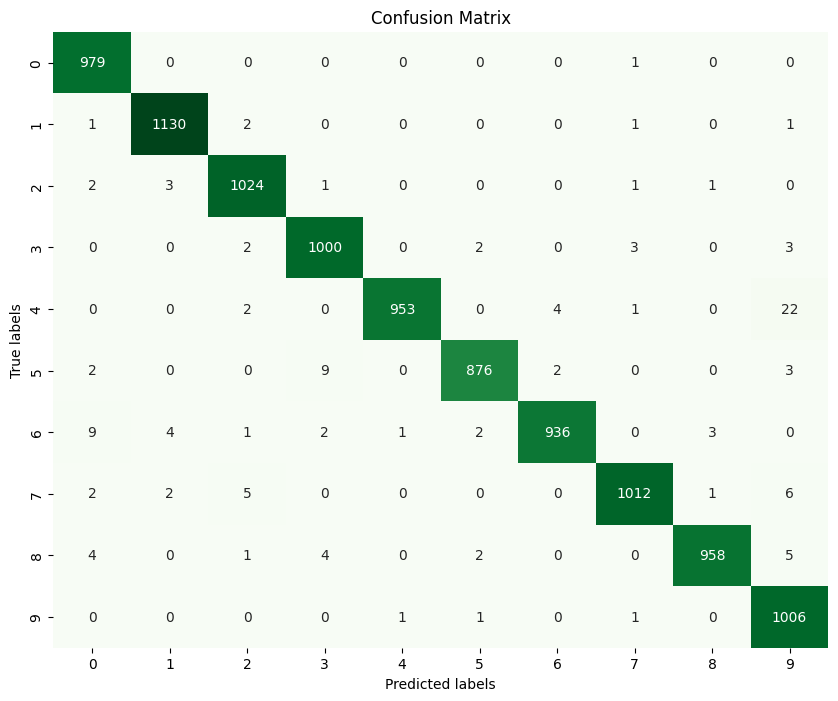

In [7]:
# Prediksi label kelas untuk data uji
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Menampilkan Confusion Matrix:

Menggunakan plt.figure untuk mengatur ukuran plot. Memanggil cmd.plot dengan colormap Blues untuk menampilkan confusion matrix dengan skema warna biru. plt.show() untuk menampilkan plot. Kode ini akan menghasilkan plot confusion matrix yang menunjukkan kinerja model dalam mengklasifikasikan digit pada dataset MNIST, memungkinkan Anda untuk melihat di mana model membuat kesalahan.